In [1]:
from importlib import reload
%load_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
sns.set_style('ticks')
matplotlib.rcParams.update(matplotlib.rc_params_from_file('./matplotlibrc'))
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(15,10)
matplotlib.rcParams['font.size']=15

#matplotlib.rcParams['font.family']='sans-serif'
#matplotlib.rcParams['font.sans-serif'] = 'Lado'
matplotlib.rcParams['text.usetex']=True
#matplotlib.rcParams['figure.titlesize']=30

## First the edge distance 

In [2]:
1e-5*10

0.0001

In [3]:
def barchart_multiple_graphtypes(datasets, graph_types, thres=10e-5):
    all_data = None
    for data, graph_type in zip(datasets, graph_types):
        #df = pd.DataFrame(data, columns = ('dist', 'BE', 'aligned', 'seed'), dtype="Int")
        df = data
        df = df[df["susc"].abs() > thres]
        df = df[df['aligned'] != 'bridge']
        
        if df["aligned"].dtype =="O":
            df["aligned"] = df["aligned"].map({"True": 1, "False":0, "cant_say": None}).astype(float)
        
        
        df.loc[:, 'BE, aligned'] = (df['susc']>thres) & (df['aligned']==1)
        df.loc[:, 'not BE, aligned'] = (df['susc']<thres) & (df['aligned']==1)

        df.loc[:, 'BE, anti-aligned'] = (df['susc']>thres) & (df['aligned']==0)
        df.loc[:, 'not BE, anti-aligned'] = (df['susc']<thres) & (df['aligned']==0)
    #    df.loc[:, 'no effect, anti-aligned'] = (df['BE']==-1) & (df['aligned']==0)

        df.loc[:, 'True predictions'] = (df['BE, aligned']==1) | (df['not BE, anti-aligned']==1)
        df.loc[:, 'False predictions'] = (df['BE, anti-aligned']==1) | (df['not BE, aligned']==1)
        df.loc[:, 'Alignment undefined'] = pd.isna(df['aligned'])


        # now all dists
        gr = (df.groupby('seed').agg('sum')/df.groupby('seed').agg('count')).reset_index()
        wide_df = gr[['seed', 'True predictions', 'False predictions','Alignment undefined']]
        long_df = pd.melt(wide_df, id_vars = ['seed'], value_vars=['True predictions', 'False predictions',  'Alignment undefined'], value_name = 'Fraction of edges')
        long_df.loc[:, 'graph_type'] = graph_type
        
        if all_data is None:
            all_data = long_df
        else:
            all_data = pd.concat([all_data, long_df])
        
        

    pl = sns.factorplot(x="variable", y="Fraction of edges", data=all_data, kind = 'bar',
                        hue='graph_type', size = 6, aspect = 1.5, ci = 'sd',\
                        units='seed', legend_out = False, linewidth=2, edgecolor='w', 
                        capsize=0.04)
    #pl.set_xticklabels(rotation=30)

    l = pl.axes[0,0].legend_
    l.set_title('Graph type')
    l.get_title().set_fontsize(20)
    for t in l.get_texts():
        t.set_fontsize('20')

    ax_orig = pl.axes[0,0]
#    ax_orig.set_xticklabels(ax_orig.get_xticklabels(), rotation=0, ha='right')


    ax_orig.set_ylim(0, 1.001)
    ax_orig.set_xlabel('')


    sns.despine(top=False, right=False)
    return pl, all_data

In [16]:
#matplotlib.rcParams['font.family']='sans-serif'
#matplotlib.rcParams['font.sans-serif'] = 'Lado'

matplotlib.rcParams['font.size']=10
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.markersize'] = 14

plt.rcParams['errorbar.capsize'] = 9
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 25

In [17]:
import pandas as pd
voronoi_data = pd.read_csv('../data/voronoi.csv')
lattice_data = pd.read_csv('../data/lattice.csv')
ieee300_data = pd.read_csv('../data/ieee300.csv')
randomgrid_data = pd.read_csv('../data/random_grid.csv')

In [18]:
!ls -altr ../data/

total 30048
drwxr-xr-x  20 debsankha.manik  staff      640 Feb 15 21:29 ..
drwxr-xr-x   7 debsankha.manik  staff      224 Feb 17 00:20 .
drwxr-xr-x   6 debsankha.manik  staff      192 Feb 27 16:39 ieee300
-rw-r--r--   1 debsankha.manik  staff   188031 Mar  2 22:29 voronoi.csv
-rw-r--r--   1 debsankha.manik  staff  2097321 Mar  2 22:30 ieee300.csv
-rw-r--r--   1 debsankha.manik  staff  9189850 Mar  2 22:43 lattice.csv
-rw-r--r--   1 debsankha.manik  staff  3896451 Mar  2 22:55 random_grid.csv


In [19]:
set(ieee300_data["aligned"])

{'False', 'True', 'bridge', 'cant_say'}

/Users/debsankha.manik/.pyenv/versions/3.8.10/envs/braess/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/debsankha.manik/.pyenv/versions/3.8.10/envs/braess/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


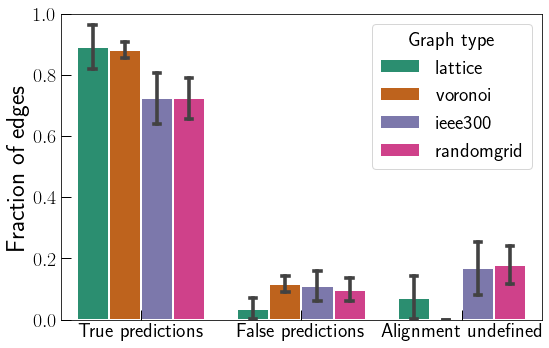

In [20]:
with sns.color_palette("Dark2"):

    pl, data_for_it = barchart_multiple_graphtypes([voronoi_data,
                                                    lattice_data,
                                                    ieee300_data,
                                                    randomgrid_data,
                                                   ], 
                                                   graph_types=[
                                                                'lattice',
                                                                'voronoi',
                                                                'ieee300',
                                                                'randomgrid'
                                                               ]
                                                  )
pl.fig.set_size_inches(7.5, 5)

pl.fig.axes[0].yaxis.set_tick_params(labelsize=20)
pl.fig.axes[0].xaxis.set_tick_params(labelsize=20)

pl.savefig('../clone_overleaf/pics/crerouting-heuristic-classifier-barchart-four-topo-nodist.pdf')
pl.savefig('../manuscript/pics/crerouting-heuristic-classifier-barchart-four-topo-nodist.svg')
pl.savefig('../manuscript/pics/crerouting-heuristic-classifier-barchart-four-topo-nodist.png')

In [26]:
data_for_it.groupby(['graph_type', 'variable'])['Fraction of edges'].describe()#.reset_index().sort_values(by='variable')

count      mean       std       min       25%  \
graph_type variable                                                             
ieee300    Alignment undefined  100.0  0.168023  0.086679  0.067568  0.106195   
           False predictions    100.0  0.108807  0.049071  0.000000  0.074937   
           True predictions     100.0  0.723170  0.082703  0.471429  0.705172   
lattice    Alignment undefined  100.0  0.071424  0.069988  0.000000  0.027027   
           False predictions    100.0  0.036083  0.035544  0.000000  0.000000   
           True predictions     100.0  0.892493  0.072531  0.644444  0.877287   
randomgrid Alignment undefined  100.0  0.178482  0.060954  0.089347  0.132178   
           False predictions    100.0  0.098051  0.037948  0.048276  0.070736   
           True predictions     100.0  0.723467  0.067698  0.522330  0.686880   
voronoi    Alignment undefined  100.0  0.000000  0.000000  0.000000  0.000000   
           False predictions    100.0  0.117230  0.026674  0.076563  0.094889   
           True predictions     100.0  0.882770  0.026674  0.803957  0.865863   

                                     50%       75%       max  
graph_type variable                                           
ieee300    Alignment undefined  0.140941  0.164570  0.390000  
           False predictions    0.121571  0.138010  0.285714  
           True predictions     0.738343  0.774861  0.932432  
lattice    Alignment undefined  0.052632  0.076923  0.350000  
           False predictions    0.025978  0.051282  0.150000  
           True predictions     0.904762  0.943629  1.000000  
randomgrid Alignment undefined  0.165557  0.213801  0.364130  
           False predictions    0.086347  0.119384  0.220077  
           True predictions     0.733653  0.772048  0.845528  
voronoi    Alignment undefined  0.000000  0.000000  0.000000  
           False predictions    0.114906  0.134137  0.196043  
           True predictions     0.885094  0.905111  0.923438

<AxesSubplot:>

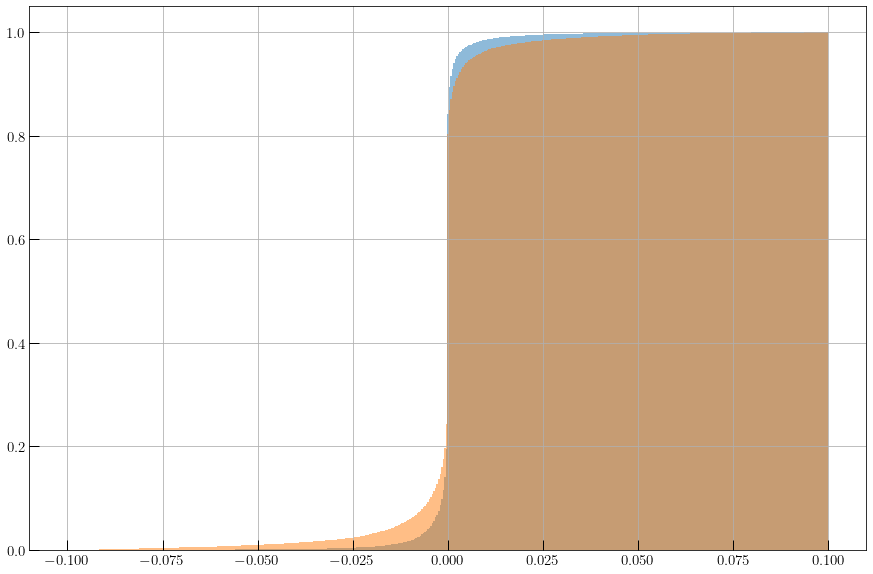

In [9]:
fig, ax = plt.subplots()

bins = np.linspace(-0.1,0.1,500)
ieee300_data.loc[ieee300_data.aligned == 'cant_say', 'susc'].hist(ax=ax, density=True, bins=bins, alpha=0.5, cumulative=True)
ieee300_data.loc[:, 'susc'].hist(ax=ax, density=True, bins=bins,alpha=0.5, cumulative=True)

In [10]:
ieee300_data

,Unnamed: 0,edge_idx,aligned,susc,dist,braessian,seed
0,0,0,bridge,-3.608225e-15,5,False,0
1,1,1,cant_say,2.444515e-03,4,True,0
2,2,2,False,-1.441005e-03,5,False,0
3,3,3,False,-6.333388e-04,5,False,0
4,4,4,False,-1.629818e-03,5,False,0
...,...,...,...,...,...,...,...
40795,40795,404,False,-1.858019e-05,12,False,99
40796,40796,405,True,3.287618e-05,11,True,99
40797,40797,406,bridge,1.422473e-16,9,True,99
40798,40798,407,bridge,1.040834e-17,10,True,99
